# Previsão da Temperatura mínima da cidade de Melbourne (AUS)
## Guilherme Teixeira Semissatto
- RA: 140656
- e-mail: semissatto@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("daily-minimum-temperatures.csv")
df['Index'] = df.index

In [3]:
df.head(10)

,Date,Temp,Index
0,1981-01-01,20.7,0
1,1981-01-02,17.9,1
2,1981-01-03,18.8,2
3,1981-01-04,14.6,3
4,1981-01-05,15.8,4
5,1981-01-06,15.8,5
6,1981-01-07,15.8,6
7,1981-01-08,17.4,7
8,1981-01-09,21.8,8
9,1981-01-10,20.0,9


In [4]:
df.shape

(3650, 3)

In [5]:
df.describe()

,Temp,Index
count,3650.000000,3650.000000
mean,11.177753,1824.500000
std,4.071837,1053.808569
min,0.000000,0.000000
25%,8.300000,912.250000
50%,11.000000,1824.500000
75%,14.000000,2736.750000
max,26.300000,3649.000000


In [6]:
# Check if data has NaN/NULL values
df.isnull().any().any()

False

In [7]:
training = df.iloc[0:3285, :]
test = df.iloc[3285:3650, :]

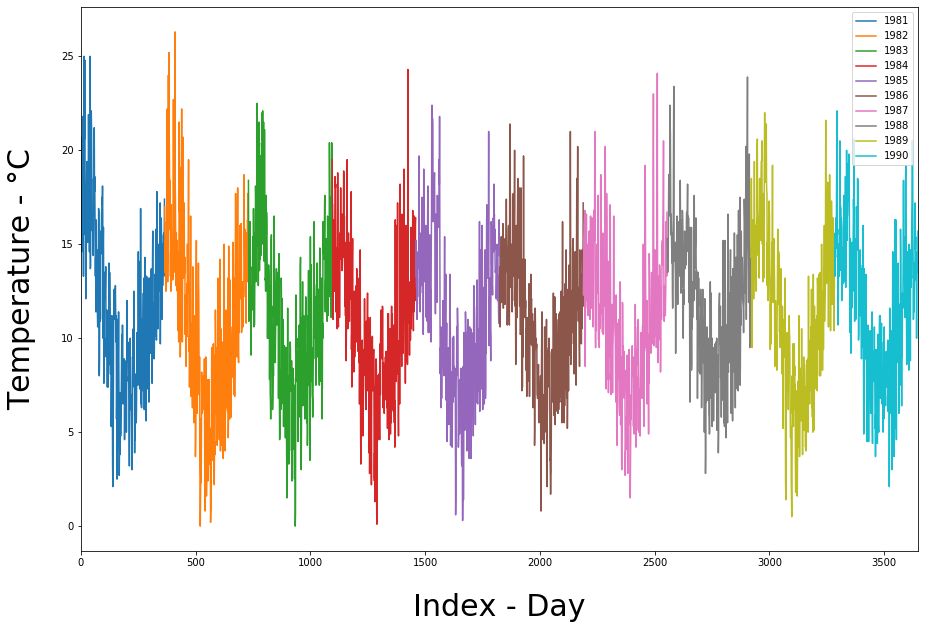

In [8]:
plt.figure(figsize = (15, 10))
df_1981 = df.iloc[0:365*1,:]
df_1981["Temp"].plot(label = "1981")
df_1982 = df.iloc[365*1:365*2,:]
df_1982["Temp"].plot(label = "1982")
df_1983 = df.iloc[365*2:365*3,:]
df_1983["Temp"].plot(label = "1983")
df_1984 = df.iloc[365*3:365*4,:]
df_1984["Temp"].plot(label = "1984")
df_1985 = df.iloc[365*4:365*5,:]
df_1985["Temp"].plot(label = "1985")
df_1986 = df.iloc[365*5:365*6,:]
df_1986["Temp"].plot(label = "1986")
df_1987 = df.iloc[365*6:365*7,:]
df_1987["Temp"].plot(label = "1987")
df_1988 = df.iloc[365*7:365*8,:]
df_1988["Temp"].plot(label = "1988")
df_1989 = df.iloc[365*8:365*9,:]
df_1989["Temp"].plot(label = "1989")
df_1990 = df.iloc[365*9:365*10-1,:]
df_1990["Temp"].plot(label = "1990")
plt.ylabel("Temperature - °C", size = 30, labelpad = 25)
plt.xlabel("Index - Day", size = 30, labelpad = 25)
plt.legend()

# Exercício 1

In [2]:
def fit_reg_lin(X, Y, add_ones = False):
    '''
    Função que gera um modelo de Regressão Linear baseado solução fechada (pseudo inversa) do tipo 
    y' = w0 + w1*X1 + ... + wk*Xk, a partir de um vetor de amostras X e Y
    output: [w0, w1, ..., wn]
    '''
    # phi matrix - add a column of 1's for w0 weight
    if add_ones:
        phi = np.c_[np.ones(len(X)), X]
    else:
        phi = X
    
    # Y matrix    
    Y = np.matrix(Y).reshape((len(Y), 1))
    
    # calculate w = (phi.T * phi)-¹ * phi.T * Y, where * is matrix product
    return (np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(Y))

In [10]:
# K = 30
k = 30

X = np.zeros((len(training), k))
Y = np.zeros((len(training), 1))

for i in range(len(training)):
    X[i] = df["Temp"][i+0 : i+k]
    Y[i] = df["Temp"][i+k]

In [11]:
print(X.shape)
print(Y.shape)

(3285, 30)
(3285, 1)


In [12]:
fit_reg_lin(X = X, Y = Y)

matrix([[ 0.00440633],
        [-0.00747553],
        [ 0.0107298 ],
        [ 0.00968777],
        [ 0.0238456 ],
        [ 0.0186785 ],
        [ 0.0062561 ],
        [-0.01835968],
        [ 0.01093561],
        [ 0.01035468],
        [ 0.02479906],
        [-0.00294139],
        [ 0.04268125],
        [ 0.01039471],
        [ 0.01283376],
        [ 0.02325452],
        [ 0.00345743],
        [ 0.0246207 ],
        [ 0.0183988 ],
        [ 0.00686687],
        [ 0.00242286],
        [ 0.03238889],
        [ 0.01844558],
        [ 0.0437055 ],
        [ 0.03088834],
        [ 0.03717095],
        [ 0.03866101],
        [ 0.05303388],
        [-0.08307523],
        [ 0.5890882 ]])

In [13]:
# K = 30
k = 30

X = np.zeros((len(training), k))
Y = np.zeros((len(training), 1))

for i in range(len(training)):
    X[i] = df["Temp"][i+0 : i+k]
    Y[i] = df["Temp"][i+k]
    
# Add a column of 1's to X for w0
X = np.c_[np.ones(len(X)), X]

In [14]:
W = fit_reg_lin(X=X, Y = Y, add_ones = False)
print (W.shape)

(31, 1)


In [15]:
X.shape

(3285, 31)

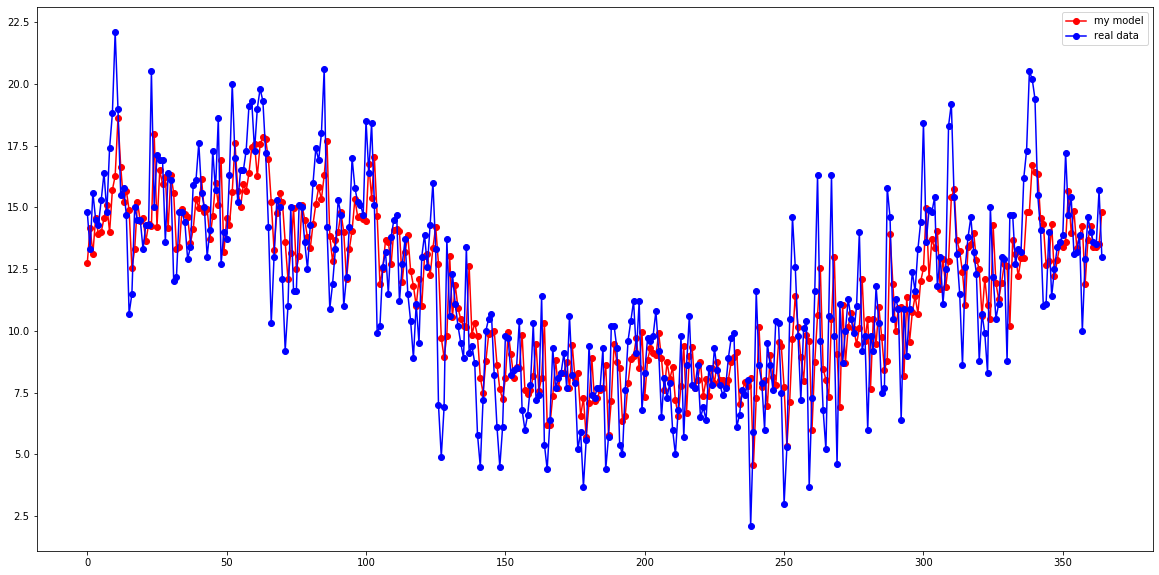

In [16]:
# Seeing the model

# data for test
k = 30
X_test = np.zeros((len(test), k))
Y_test = np.zeros((len(test), 1))
                  
for i in range(len(test)):
    X_test[i] = df["Temp"][len(df["Temp"]) - 365 - k + i: len(df["Temp"]) - 365 + i]
    Y_test[i] = df["Temp"][len(df["Temp"]) - 365 + i]

# Add a column of 1's to X for w0
X_test = np.c_[np.ones(len(X_test)), X_test]

# calculate y^
y_estimated = X_test.dot(W)
y_real = Y_test

# plot model and real data
plt.figure(figsize = (20, 10))
plt.plot(y_estimated, color = "red", label = "my model", marker = "o")
plt.plot(y_real, color = "blue", label = "real data", marker = "o")
plt.legend()

In [45]:
def rmse(y, y_est):
    ''' Esta função retorna a raíz
        da somatória do erro quadrático médio entre dois vetores (y e y_est de entrada)'''
    sum = 0
    if len(y) != len(y_est):
        return -1
    
    for i in range(len(y)):
        error = (y[i] - y_est[i]) ** 2
        sum += error
        
    return np.sqrt(sum/len(y))

In [18]:
rmse_k30 = rmse(y_real, y_estimated)
rmse_k30

matrix([[2.26442399]])

In [19]:
# K = 30
k = 30

X = np.zeros((len(training), k))
Y = np.zeros((len(training), 1))

for i in range(len(training)):
    X[i] = df["Temp"][i+0 : i+k]
    Y[i] = df["Temp"][i+k]
    
W = fit_reg_lin(X=X, Y = Y, add_ones = True)

# data for test
k = 30
X_test = np.zeros((len(test), k))
Y_test = np.zeros((len(test), 1))
                  
for i in range(len(test)):
    X_test[i] = df["Temp"][len(df["Temp"]) - 365 - k + i: len(df["Temp"]) - 365 + i]
    Y_test[i] = df["Temp"][len(df["Temp"]) - 365 + i]

# Add a column of 1's to X for w0
X_test = np.c_[np.ones(len(X_test)), X_test]

# calculate y^
y_estimated = X_test.dot(W)
y_real = Y_test

# K-fold

- dividir o dataset em K pastas
- gerar dados de treinamento das K-1 pastas, considerando N dias anteriores
- gerar dados de validação da pasta, considerando N dias anteriores
- Para cada N, obter K modelos
- calcular RMSE dos K modelos e calcular a media de RMSE para os K modelos para cada N
- plotar a média RMSE obtida anterior para cada N
- obter o valor de N para qual se obteve a menor média RMSE
- obter o modelo que gerou N e aplicar para os dados de teste de 1990, plotando a série temporal de testes juntamente com as estimativas

In [20]:
def kfold_n(data = pd.DataFrame(), K = 2, n = 1):
    '''
    Esta função divide o dataset em K pastas para serem treinados com n dias anteriores
    Data: dataset a ser dividido
    K: número de pastas
    n: número de dias corridos
    Retorno:
    Uma lista de K elementos em que cada elemento é a k-ésima pasta
    Retorna as k-1 pastas para treinamento, e a pasta para validação
    '''
    if (K == 1):
        print ("K must be > 1")
        return -1
        
    number_elements = round(len(data)/K)
    folders = list(range(K))
    
    for i in range(K):
        # Limita o range da última pasta, pois não há dados futuros
        if (i == K-1):
            folders[i] = data.iloc[number_elements*i : number_elements*(i + 1), :]
        else:
            folders[i] = data.iloc[number_elements*i : number_elements*(i + 1) + n, :]
    
    return folders 

In [21]:
folders = kfold_n(data = df, K = 10, n = 30)

In [22]:
def phi_y(data = pd.DataFrame(), n = 1):
    '''
    Esta função gera a matriz Phi e a matriz Y, a partir do dataset data, considerando n dias anteriores
    Retorno:
    Uma lista de 2 elementos, sendo o primeiro elemento a matriz Phi, e o segundo elemento a matriz Y
    '''
    Phi = np.zeros((len(data) - n, n))
    Y = np.zeros((len(data) - n, 1))
    for i in range(len(data) - n):
        Phi[i] = data["Temp"].iloc[i : i+n]
        Y[i] = data["Temp"].iloc[i+n]

    return [Phi, Y]

# Folds utilizados
- Utilizou-se um valor de 10 pastas, devido à periodicidade anual dos valores de temperatura
- Para a validação cruzada do modelo utilizou-se o esquema de K-pastas definido da seguinte maneira:
![k-folds](k-folds.png)

# fold 0 
- folds 0 - 9: training
- fold 9: validation

In [23]:
training_k_0 = list(range(30))
validation_k_0 = list(range(30))
model_k_0 = list(range(30))
RMSE_k_0 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_0[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8]]),\
                    n = i+1))

    validation_k_0[i] = (phi_y(data = folders[9], n = i+1))

    model_k_0[i] = (fit_reg_lin(X = training_k_0[i][0], Y = training_k_0[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_0[i][0] = np.c_[np.ones(len(validation_k_0[i][0])), validation_k_0[i][0]]

    # calculate y^
    y_estimated = validation_k_0[i][0].dot(model_k_0[i])
    y_real = validation_k_0[i][1]
    RMSE_k_0[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_0)

[2.4343572435758407, 2.438770999519734, 2.388916326884859, 2.3416113138594032, 2.3262637176032857, 2.319071944999313, 2.3074606594692875, 2.3058026663685194, 2.290634728652196, 2.290751588328641, 2.2726023078180213, 2.264557879307978, 2.258766876158558, 2.261971155742553, 2.2607376412719424, 2.2550170230087367, 2.259181434083711, 2.2707165260503817, 2.273843684207687, 2.2688644952665893, 2.2650131591528972, 2.267006542053185, 2.2699719757517456, 2.2525341672873345, 2.2494300341016555, 2.2476076432985326, 2.2495058480960743, 2.2522953606378975, 2.2486887114847565, 2.25153443003534]


# fold 1 
- folds 1, 2, 3, 4, 5, 6, 7, 9: training
- fold 8: validation

In [24]:
training_k_1 = list(range(30))
validation_k_1 = list(range(30))
model_k_1 = list(range(30))
RMSE_k_1 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_1[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_1[i] = (phi_y(data = folders[8], n = i+1))

    model_k_1[i] = (fit_reg_lin(X = training_k_1[i][0], Y = training_k_1[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_1[i][0] = np.c_[np.ones(len(validation_k_1[i][0])), validation_k_1[i][0]]

    # calculate y^
    y_estimated = validation_k_1[i][0].dot(model_k_1[i])
    y_real = validation_k_1[i][1]
    RMSE_k_1[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_1)

[2.32464107865098, 2.3019754843932785, 2.2626138221401084, 2.2456126583630525, 2.2300915615741146, 2.203076352571634, 2.193702173839896, 2.192551366362476, 2.1941968390298725, 2.1951332004757633, 2.1885087055788772, 2.183574250450887, 2.1797020237495315, 2.18747870984625, 2.1752018965861812, 2.167735732550091, 2.1622113392946614, 2.161211512162596, 2.166950442544506, 2.162170352187659, 2.169944291294321, 2.173927771888628, 2.1758310399442746, 2.176947643391077, 2.1789994892741182, 2.1819580172625805, 2.192201671976347, 2.182894388890765, 2.183305569542142, 2.186683269997095]


# fold 2 
- folds 1, 2, 3, 4, 5, 6, 8, 9: training
- fold 7: validation

In [25]:
training_k_2 = list(range(30))
validation_k_2 = list(range(30))
model_k_2 = list(range(30))
RMSE_k_2 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_2[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_2[i] = (phi_y(data = folders[7], n = i+1))

    model_k_2[i] = (fit_reg_lin(X = training_k_2[i][0], Y = training_k_2[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_2[i][0] = np.c_[np.ones(len(validation_k_2[i][0])), validation_k_2[i][0]]

    # calculate y^
    y_estimated = validation_k_2[i][0].dot(model_k_2[i])
    y_real = validation_k_2[i][1]
    RMSE_k_2[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_2)

[2.5719823320705753, 2.5662660734424216, 2.526500600451438, 2.5139209952299852, 2.470481496464049, 2.455857582421899, 2.4465243184021968, 2.439379829292422, 2.4339224935237196, 2.431137958186845, 2.432529215614217, 2.428313712899545, 2.4055570004550404, 2.41015472354224, 2.399559740322685, 2.4058101391062645, 2.410618664744647, 2.412367784061751, 2.41798640676969, 2.418538730487663, 2.4168982981456284, 2.4188770371512422, 2.422050453570295, 2.418579618851629, 2.420192299214131, 2.4211094425039623, 2.4245414169733976, 2.4281708823226573, 2.415710385361299, 2.4025269418978663]


# fold 3 
- folds 1, 2, 3, 4, 5, 7, 8, 9: training
- fold 6: validation

In [26]:
training_k_3 = list(range(30))
validation_k_3 = list(range(30))
model_k_3 = list(range(30))
RMSE_k_3 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_3[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_3[i] = (phi_y(data = folders[6], n = i+1))

    model_k_3[i] = (fit_reg_lin(X = training_k_3[i][0], Y = training_k_3[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_3[i][0] = np.c_[np.ones(len(validation_k_3[i][0])), validation_k_3[i][0]]

    # calculate y^
    y_estimated = validation_k_3[i][0].dot(model_k_3[i])
    y_real = validation_k_3[i][1]
    RMSE_k_3[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_3)

[2.475389141057755, 2.4840272041747653, 2.494099678153866, 2.462007942414377, 2.459162524864066, 2.442480708368244, 2.4555888145618745, 2.450802319707367, 2.437623115923785, 2.4322595417964004, 2.4268396897107825, 2.4320184715881026, 2.436267905955057, 2.4286823923200456, 2.4162132546281776, 2.4116576071474385, 2.4068193398281914, 2.4053022720685813, 2.4104668536241296, 2.408590569031888, 2.4099654996862063, 2.41460922789529, 2.4175286666534124, 2.418947453510234, 2.417866868660858, 2.4156963734688683, 2.416568898530929, 2.4215291212059813, 2.4242968230111317, 2.425731194198525]


# fold 4 
- folds 1, 2, 3, 4, 6, 7, 8, 9: training
- fold 5: validation

In [27]:
training_k_4 = list(range(30))
validation_k_4 = list(range(30))
model_k_4 = list(range(30))
RMSE_k_4 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_4[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_4[i] = (phi_y(data = folders[5], n = i+1))

    model_k_4[i] = (fit_reg_lin(X = training_k_4[i][0], Y = training_k_4[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_4[i][0] = np.c_[np.ones(len(validation_k_4[i][0])), validation_k_4[i][0]]

    # calculate y^
    y_estimated = validation_k_4[i][0].dot(model_k_4[i])
    y_real = validation_k_4[i][1]
    RMSE_k_4[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_4)

[2.5654223511474417, 2.5533222707186973, 2.486048077656975, 2.450843392646778, 2.4521744431276096, 2.437211321578714, 2.4305814852406167, 2.4240875550705923, 2.427658593614737, 2.422655341042552, 2.422425711690957, 2.417830949895649, 2.414273386812147, 2.4148843229908503, 2.400418680794399, 2.405777926108724, 2.3991096315240132, 2.3994486888811957, 2.401792017863465, 2.399802376380256, 2.4089277147748867, 2.4101246235015723, 2.4123164623546485, 2.415763547702353, 2.4171792002732153, 2.4167108799622365, 2.415824212107326, 2.4171667234906193, 2.4181303037275534, 2.4148074002377107]


# fold 5
- folds 1, 2, 3, 5, 6, 7, 8, 9: training
- fold 4: validation

In [28]:
training_k_5 = list(range(30))
validation_k_5 = list(range(30))
model_k_5 = list(range(30))
RMSE_k_5 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_5[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_5[i] = (phi_y(data = folders[4], n = i+1))

    model_k_5[i] = (fit_reg_lin(X = training_k_5[i][0], Y = training_k_5[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_5[i][0] = np.c_[np.ones(len(validation_k_5[i][0])), validation_k_5[i][0]]

    # calculate y^
    y_estimated = validation_k_5[i][0].dot(model_k_5[i])
    y_real = validation_k_5[i][1]
    RMSE_k_5[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_5)

[2.467825137423584, 2.4555937342136556, 2.4158984763871034, 2.3875894893387946, 2.38736549348781, 2.362341393075138, 2.3532350577638144, 2.3553351028084113, 2.3560046575633042, 2.360527650589524, 2.3677836249534394, 2.3640168428805306, 2.3712791516437326, 2.357198686666273, 2.3599146999324367, 2.3624549070246057, 2.3537390553647675, 2.3561841209989502, 2.356779874362329, 2.351090351363869, 2.349669989164446, 2.3485678007456228, 2.3509008477812543, 2.3532514122771087, 2.351440242741094, 2.3521199218647557, 2.3457076367883536, 2.3471320219593372, 2.3548382735009703, 2.3505224094951926]


# fold 6
- folds 1, 2, 4, 5, 6, 7, 8, 9: training
- fold 3: validation

In [29]:
training_k_6 = list(range(30))
validation_k_6 = list(range(30))
model_k_6 = list(range(30))
RMSE_k_6 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_6[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_6[i] = (phi_y(data = folders[3], n = i+1))

    model_k_6[i] = (fit_reg_lin(X = training_k_6[i][0], Y = training_k_6[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_6[i][0] = np.c_[np.ones(len(validation_k_6[i][0])), validation_k_6[i][0]]

    # calculate y^
    y_estimated = validation_k_6[i][0].dot(model_k_6[i])
    y_real = validation_k_6[i][1]
    RMSE_k_6[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_6)

[2.6583015138067805, 2.6472882492287426, 2.5949593584721904, 2.565620032558774, 2.5248898459394535, 2.51016857127463, 2.4926838706407826, 2.4808373788778253, 2.475970642437348, 2.4774018456528277, 2.472864929903352, 2.472704625569708, 2.4775557625403346, 2.4765816094394375, 2.47001554519939, 2.466095998819754, 2.471001063420291, 2.4721125943517097, 2.474947501171783, 2.4795413527776478, 2.482005459684292, 2.4856257402770026, 2.48405663959689, 2.485111126788222, 2.478167973384603, 2.477344748513414, 2.476810293614559, 2.476877154878597, 2.478980464108689, 2.4817402872774976]


# fold 7
- folds 1, 3, 4, 5, 6, 7, 8, 9: training
- fold 2: validation

In [30]:
training_k_7 = list(range(30))
validation_k_7 = list(range(30))
model_k_7 = list(range(30))
RMSE_k_7 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_7[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[1],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_7[i] = (phi_y(data = folders[2], n = i+1))

    model_k_7[i] = (fit_reg_lin(X = training_k_7[i][0], Y = training_k_7[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_7[i][0] = np.c_[np.ones(len(validation_k_7[i][0])), validation_k_7[i][0]]

    # calculate y^
    y_estimated = validation_k_7[i][0].dot(model_k_7[i])
    y_real = validation_k_7[i][1]
    RMSE_k_7[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_7)

[2.628219697739694, 2.628512463510306, 2.5527494474429417, 2.5283605455025957, 2.5268867107698405, 2.517202646199528, 2.490722608958201, 2.481787577967962, 2.4742868989590185, 2.4758306806335733, 2.4652322141036227, 2.467820214435488, 2.4644419497035295, 2.4618085437451995, 2.492325863403493, 2.5114375252986156, 2.508264566579507, 2.516555257854532, 2.5211676914153798, 2.523532783506653, 2.5161906725744454, 2.5192141695302954, 2.514551225196512, 2.517248254223207, 2.5172470745708537, 2.5171608393543004, 2.5161576610918908, 2.5208536132885353, 2.529200442958012, 2.5376083287802658]


# fold 8
- folds 2, 3, 4, 5, 6, 7, 8, 9: training
- fold 1: validation

In [31]:
training_k_8 = list(range(30))
validation_k_8 = list(range(30))
model_k_8 = list(range(30))
RMSE_k_8 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_8[i] = (phi_y(data = pd.concat([folders[0],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_8[i] = (phi_y(data = folders[1], n = i+1))

    model_k_8[i] = (fit_reg_lin(X = training_k_8[i][0], Y = training_k_8[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_8[i][0] = np.c_[np.ones(len(validation_k_8[i][0])), validation_k_8[i][0]]

    # calculate y^
    y_estimated = validation_k_8[i][0].dot(model_k_8[i])
    y_real = validation_k_8[i][1]
    RMSE_k_8[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_8)

[2.842479445582622, 2.852879754362729, 2.7961022601102785, 2.7643296552663608, 2.734371095385862, 2.7200895500136797, 2.7000249831130545, 2.6817609863314784, 2.674101589553728, 2.679984930779806, 2.691377612605215, 2.6752914259423783, 2.6663866596238623, 2.666755510585651, 2.6685414605567113, 2.669116504070704, 2.636881657079348, 2.626269862800988, 2.6233516848534837, 2.6049946681682443, 2.60939302008796, 2.6119114504609877, 2.612982548859093, 2.616822213019138, 2.6141272221411285, 2.6081489597250083, 2.612585111974277, 2.6105586385293815, 2.611072304261197, 2.6405692142343478]


# fold 9
- folds 1,2, 3, 4, 5, 6, 7, 8, 9: training
- fold 0: validation

In [32]:
training_k_9 = list(range(30))
validation_k_9 = list(range(30))
model_k_9 = list(range(30))
RMSE_k_9 = list(range(30))

# Este laço retorna 30 modelos e 30 valores de erro RMSE para a k-ésima seleção de pasta do k-fold
for i in range(0,30):
    training_k_9[i] = (phi_y(data = pd.concat([folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8],\
                                      folders[9]]),\
                    n = i+1))

    validation_k_9[i] = (phi_y(data = folders[0], n = i+1))

    model_k_9[i] = (fit_reg_lin(X = training_k_9[i][0], Y = training_k_9[i][1], add_ones = 1))

    # Add a column of 1's for w0
    validation_k_9[i][0] = np.c_[np.ones(len(validation_k_9[i][0])), validation_k_9[i][0]]

    # calculate y^
    y_estimated = validation_k_9[i][0].dot(model_k_9[i])
    y_real = validation_k_9[i][1]
    RMSE_k_9[i] = float(rmse(y_estimated, y_real))
    
print(RMSE_k_9)

[2.6336415455629285, 2.612616758955302, 2.570239124984213, 2.5473972587755003, 2.5085063363255067, 2.5214940393682506, 2.503764695783104, 2.5010484041499432, 2.4907501686032036, 2.4937472564949545, 2.4929744126830258, 2.4814678261144643, 2.4783250613603984, 2.46850393570055, 2.4638546172178466, 2.4625363136131275, 2.4604408816883345, 2.4408991414361267, 2.435087594157696, 2.4402105787241775, 2.4456574426014255, 2.4272028177113882, 2.4311879325623185, 2.4337738309938377, 2.438156530539357, 2.4381028566504956, 2.440100694111456, 2.442062506276949, 2.4465192097324104, 2.448480689719376]


# Avaliando a média dos K modelos

In [33]:
medias_rmse = [(RMSE_k_0[i] + RMSE_k_1[i] + RMSE_k_2[i] + RMSE_k_3[i] + RMSE_k_4[i] +\
                RMSE_k_5[i] + RMSE_k_6[i] + RMSE_k_7[i] + RMSE_k_8[i] + RMSE_k_9[i])/10 for i in range(30)]

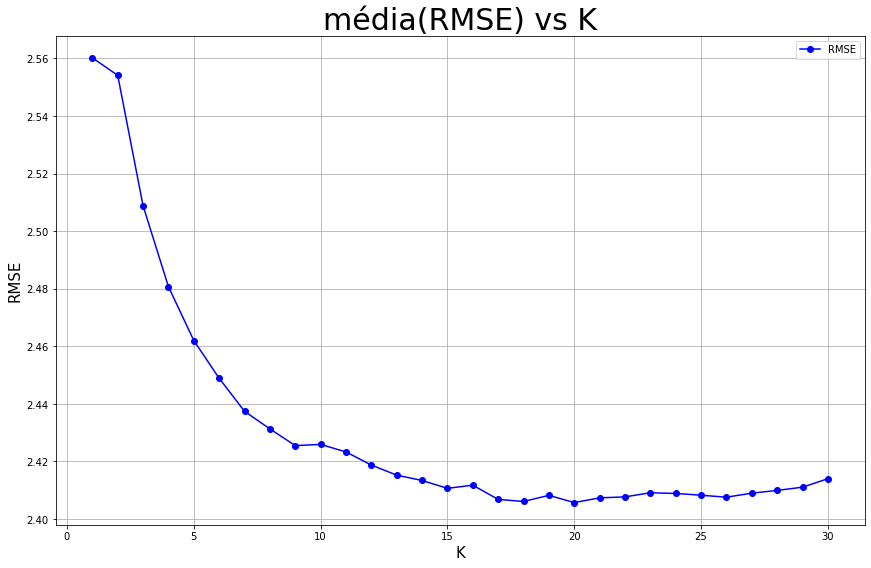

In [34]:
plt.figure(figsize = (14.5, 9))
plt.plot(range(1,31,1), medias_rmse, color = "blue", label = "RMSE", marker = "o")
plt.title ("média(RMSE) vs K", fontsize = 30)
plt.xlabel("K", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.grid()
plt.legend()

# Amostras de teste temporal e respectivas estimativas
- A curva acima mostra um ponto mínimo para K = 20 dias passados
- Dados para treinamento: 1981 - 1989
- Dados para teste: 1990

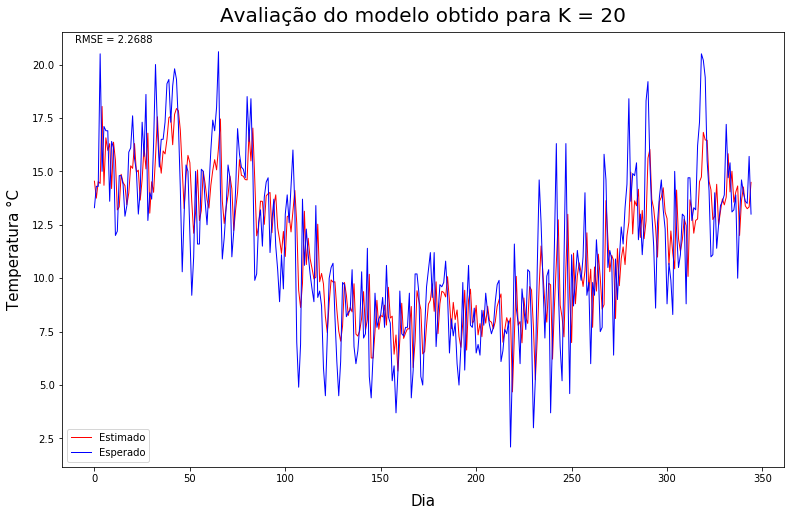

In [35]:
# Separa o dataset de 1980 até 1989 como treinamento com n = 20 (que se mostrou como melhor hiper-parâmetro)
training = phi_y(data =pd.concat([    folders[0],\
                                      folders[1],\
                                      folders[2],\
                                      folders[3],\
                                      folders[4],\
                                      folders[5],\
                                      folders[6],\
                                      folders[7],\
                                      folders[8]])\
                 ,n = 20)

test = phi_y(data = folders[9], n = 20)

# Obtém o modelo para os dados de treinamento
W = fit_reg_lin(X = training[0], Y = training[1], add_ones = 1)

# Adiciona uma coluna de 1's para à matriz Phi para o peso w0
test[0] = np.c_[np.ones(len(test[0])), test[0]]

# Calula a saída estimada do tipo Y = Phi.W
y_estimated = test[0].dot(W)
y_real = test[1]

RMSE = float(rmse(y_estimated, y_real))

# Plotando as saídas reais e estimadas do melhor modelo encontrado
plt.figure(figsize = (12.944, 8))
plt.plot(y_estimated, color = "red", label = "Estimado", linewidth = 1)
plt.plot(y_real, color = "blue", label = "Esperado", linewidth = 1)
plt.title("Avaliação do modelo obtido para K = 20", fontsize = 20, pad = 10)
plt.text(x = -10, y = 21, s = "RMSE = 2.2688")
plt.xlabel("Dia", fontsize = 15, labelpad = 10)
plt.ylabel("Temperatura °C", fontsize = 15, labelpad = 10)
plt.legend()

# Exercício 2

In [5]:
df2 = df.copy()

In [6]:
df2.head(10)

,Date,Temp,Index
0,1981-01-01,20.7,0
1,1981-01-02,17.9,1
2,1981-01-03,18.8,2
3,1981-01-04,14.6,3
4,1981-01-05,15.8,4
5,1981-01-06,15.8,5
6,1981-01-07,15.8,6
7,1981-01-08,17.4,7
8,1981-01-09,21.8,8
9,1981-01-10,20.0,9


In [7]:
# Mapeamento linear do tipo:
# x' = x/(max - min) - min/(max - min)

feature_scale = lambda x:(x/(df2["Temp"].max() - df2["Temp"].min())\
                          - df2["Temp"].min()/(df2["Temp"].max() - df2["Temp"].min()))

In [8]:
df2["Temp_scaled"] = df2["Temp"].apply(feature_scale)
df2["Temp_scaled"] = df2["Temp_scaled"]-0.5
df2["Temp_scaled"] = df2["Temp_scaled"]*3 

In [9]:
def rmse(y, y_est):
    ''' Esta função retorna a raíz
        da somatória do erro quadrático médio entre dois vetores (y e y_est de entrada)'''
    sum = 0
    if len(y) != len(y_est):
        return -1
    
    for i in range(len(y)):
        error = (y[i] - y_est[i]) ** 2
        sum += error
        
    return np.sqrt(sum/len(y))

In [10]:
def phi_y(data = pd.DataFrame(), n = 1):
    '''
    Esta função gera a matriz Phi e a matriz Y, a partir do dataset data, considerando n dias anteriores
    Retorno:
    Uma lista de 2 elementos, sendo o primeiro elemento a matriz Phi, e o segundo elemento a matriz Y
    '''
    Phi = np.zeros((len(data) - n, n))
    Y = np.zeros((len(data) - n, 1))
    for i in range(len(data) - n):
        Phi[i] = data["Temp_scaled"].iloc[i : i+n]
        Y[i] = data["Temp"].iloc[i+n]

    return [Phi, Y]

In [12]:
X_5days = phi_y(data = df2, n = 5)[0]
Y_5days = phi_y(data = df2, n = 5)[1]
# Matriz W com coeficientes aleatórios em distribuição normal
W = np.array([[np.random.uniform(0,1) for i in range(5)] for i in range(100)])

In [13]:
Phi = np.zeros(shape = (len(Y_5days), len(W)))

for row in range(Phi.shape[0]):
    for column in range(Phi.shape[1]):
        Phi[row][column] = np.tanh(W[column].dot(X_5days[row]))
        
print (Phi)

[[ 0.79496795  0.92384897  0.74888433 ...  0.80525671  0.81417338
   0.84878835]
 [ 0.57717241  0.88109014  0.69820366 ...  0.71121087  0.71770023
   0.78271262]
 [ 0.56312047  0.79800114  0.56897377 ...  0.49463168  0.67242655
   0.69596028]
 ...
 [ 0.0261758  -0.14465748 -0.03123381 ...  0.11004135  0.02735326
  -0.07892455]
 [ 0.14169296  0.20971392  0.15150316 ...  0.24007591  0.15914872
   0.17030644]
 [ 0.17488323  0.35121157  0.2600269  ...  0.20076135  0.29717919
   0.21727923]]


In [14]:
# Slicing
Phi[:, 0:1]

array([[0.79496795],
       [0.57717241],
       [0.56312047],
       ...,
       [0.0261758 ],
       [0.14169296],
       [0.17488323]])

# K-folds
- novamente, segmentando o dataset em 9 pastas devido à periodicidade anual
- considerando 5 dias de atraso
- e realizando K experiências de aprendizagem, conforme abaixo:
![K-folds](k-folds-v2.png)

In [15]:
def kfold_n(data = pd.DataFrame(), K = 2, n = 1):
    '''
    Esta função divide o dataset em K pastas para serem treinados com n dias anteriores
    Data: dataset a ser dividido
    K: número de pastas
    n: número de dias corridos
    Retorno:
    Uma lista de K elementos em que cada elemento é a k-ésima pasta
    Retorna as k-1 pastas para treinamento, e a pasta para validação
    '''
    if (K == 1):
        print ("K must be > 1")
        return -1
        
    number_elements = round(len(data)/K)
    folders = list(range(K))
    
    for i in range(K):
        # Limita o range da última pasta, pois não há dados futuros
        if (i == K-1):
            folders[i] = data.iloc[number_elements*i : number_elements*(i + 1) + n, :]
        else:
            folders[i] = data.iloc[number_elements*i : number_elements*(i + 1) + n, :]
    
    return folders 

In [16]:
folders = kfold_n(data = df2.iloc[0:len(df2)-365, :], K = 9, n = 5)
# fold 0
fold_0 = pd.concat([folders[0], folders[1], folders[2], folders[3], folders[4], folders[5], folders[6], folders[7]])
train_0 = folders[8]
# fold 1
fold_1 = pd.concat([folders[0], folders[1], folders[2], folders[3], folders[4], folders[5], folders[6], folders[8]])
train_1 = folders[7]
# fold 2
fold_2 = pd.concat([folders[0], folders[1], folders[2], folders[3], folders[4], folders[5], folders[7], folders[8]])
train_2 = folders[6]
# fold 3
fold_3 = pd.concat([folders[0], folders[1], folders[2], folders[3], folders[4], folders[6], folders[7], folders[8]])
train_3 = folders[5]
# fold 4
fold_4 = pd.concat([folders[0], folders[1], folders[2], folders[3], folders[5], folders[6], folders[7], folders[8]])
train_4 = folders[4]
# fold 5
fold_5 = pd.concat([folders[0], folders[1], folders[2], folders[4], folders[5], folders[6], folders[7], folders[8]])
train_5 = folders[3]
# fold 6
fold_6 = pd.concat([folders[0], folders[1], folders[3], folders[4], folders[5], folders[6], folders[7], folders[8]])
train_6 = folders[2]
# fold 7
fold_7 = pd.concat([folders[0], folders[2], folders[3], folders[4], folders[5], folders[6], folders[7], folders[8]])
train_7 = folders[1]
# fold 8
fold_8 = pd.concat([folders[1], folders[2], folders[3], folders[4], folders[5], folders[6], folders[7], folders[8]])
train_8 = folders[0]


folds = [fold_0, fold_1, fold_2, fold_3, fold_4, fold_5, fold_6, fold_7, fold_8]
train = [train_0, train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8]

In [17]:
for i in folds:
    print (i.shape)


for i in train:
    print (i.shape)

(2960, 4)
(2955, 4)
(2955, 4)
(2955, 4)
(2955, 4)
(2955, 4)
(2955, 4)
(2955, 4)
(2955, 4)
(365, 4)
(370, 4)
(370, 4)
(370, 4)
(370, 4)
(370, 4)
(370, 4)
(370, 4)
(370, 4)


In [18]:
def fit_reg_lin_lambda(X, Y, alpha = 0, add_ones = False):
    '''
    Função que gera um modelo de Regressão Linear baseado solução fechada (pseudo inversa) do tipo 
    y' = w0 + w1*X1 + ... + wk*Xk, a partir de um vetor de amostras X e Y
    Com restrição de magnitude dos coeficientes
    output: [w0, w1, ..., wn]
    '''
    # phi matrix - add a column of 1's for w0 weight
    if add_ones:
        phi = np.c_[np.ones(len(X)), X]
    else:
        phi = X

    # Y matrix    
    Y = np.matrix(Y).reshape((len(Y), 1))
    
    # I' matrix
    I = np.identity(phi.shape[1])
    I[0,0] = 0
    
    #print ("Phi shape: ", phi.shape, "I shape: ", I.shape, "Y shape: ", Y.shape)
    # calculate w = (phi.T * phi)-¹ * phi.T * Y, where * is matrix product
    return (np.linalg.inv(phi.T.dot(phi) + alpha*I).dot(phi.T).dot(Y))

In [19]:
A = np.matrix([[3,2], [3,4]])
B = np.matrix([[1],[2]])
x = fit_reg_lin_lambda(X = A, Y = B, alpha = 0, add_ones = True)
print(x)
x = fit_reg_lin(X = A, Y = B, add_ones = True)
print(x)

[[ 0. ]
 [-0.5]
 [ 0.5]]
[[ 0. ]
 [-0.5]
 [ 0.5]]


In [46]:
# para cada K
    # gerar T modelos
        # avaliar T modelos com sua média
        
# Matriz W com coeficientes aleatórios em distribuição normal
T = 100
W = np.array([[np.random.uniform(0,1) for i in range(5)] for i in range(T)])
Phi = list(range(len(folds)))

Models = [[i for i in range(T)] for i in range(len(folds))] #np.zeros(shape = (len(folds), T))

for i in range(len(folds)):
    X_5days = phi_y(data = folds[i], n = 5)[0]
    Y_5days = phi_y(data = folds[i], n = 5)[1]

    Phi = np.zeros(shape = (len(Y_5days), len(W)))

    for row in range(Phi.shape[0]):
        for column in range(Phi.shape[1]):
            Phi[row][column] = np.tanh(W[column].dot(X_5days[row]))
            
    for j in range(T):
        Models[i][j] = fit_reg_lin(X = Phi[:, 0:j], Y = Y_5days, add_ones = True)

In [24]:
import datetime

print(datetime.datetime.now())

2019-09-25 18:42:32.334029


In [27]:
# para cada T
    # varrer lambda
        # para cada K (k-fold)
T = 100
Alpha = [np.power(2, i) for i in np.arange(-9, 9, step = 3, dtype = float)]
RMSEs = []
progress = 0
print(T*len(Alpha)*len(folds))


for t in range(0,T):
    W = np.array([[np.random.uniform(0, 1) for i in range(5)] for i in range(t+1)])
    for alpha in Alpha:
        for i in range(len(folds)):
            
            
            X_5days, Y_5days = phi_y(data = folds[i], n = 5)
            
            #Phi = np.zeros(shape = (len(Y_5days), len(W)))
            Phi = np.zeros(shape = (len(Y_5days), t+1))
            
            for row in range(Phi.shape[0]):
                for column in range(Phi.shape[1]):
                    Phi[row][column] = np.tanh(W[column].dot(X_5days[row]))
            #print("Phi mean max min:\n",Phi.mean(),Phi.max(),Phi.min())
            
            model_t_alpha_k = fit_reg_lin_lambda(X = Phi[:, 0:t+1], Y = Y_5days, alpha = alpha, add_ones = True)
            #print ("Modelo: \n", model_t_alpha_k)

            # Adiciona uma coluna de 1's para à matriz Phi para o peso w0           
            X_Validation_5days, Y_Validation_5days = phi_y(data = train[i], n = 5)
            

            # Calula a saída estimada do tipo Y = Phi.W
            Phi_Validation = np.zeros(shape = (len(Y_Validation_5days), t+1))
            
            
            for row in range(Phi_Validation.shape[0]):
                for column in range(Phi_Validation.shape[1]):
                    Phi_Validation[row][column] = np.tanh(W[column].dot(X_Validation_5days[row]))
            #print("Phi_Validation mean max min:\n",Phi_Validation.mean(),Phi_Validation.max(),Phi_Validation.min())   
            Phi_Validation = np.c_[np.ones(len(Phi_Validation)), Phi_Validation]
            y_estimated = Phi_Validation[:, 0:t+2].dot(model_t_alpha_k) #not sure what use as Phi for validation
            y_real = Y_Validation_5days
            progress += 1
            if progress%100 == 0:
                print ("progress: ", progress)
                print(datetime.datetime.now())
            RMSE = float(rmse(y_estimated, y_real))
            #print("t: ", str(t), "alpha: ", str(alpha), "K: ", str(i), "RMSE: ", RMSE)
            RMSEs.append([i, alpha, t, RMSE])            

5400
progress:  100
2019-09-25 18:45:45.148038
progress:  200
2019-09-25 18:46:24.590563
progress:  300
2019-09-25 18:47:07.125392
progress:  400
2019-09-25 18:47:50.262814
progress:  500
2019-09-25 18:48:35.427010
progress:  600
2019-09-25 18:49:21.462542
progress:  700
2019-09-25 18:50:09.644463
progress:  800
2019-09-25 18:50:58.848335
progress:  900
2019-09-25 18:51:48.923225
progress:  1000
2019-09-25 18:52:40.496310
progress:  1100
2019-09-25 18:53:33.610886
progress:  1200
2019-09-25 18:54:28.382269
progress:  1300
2019-09-25 18:55:24.399346
progress:  1400
2019-09-25 18:56:23.096727
progress:  1500
2019-09-25 18:57:23.165396
progress:  1600
2019-09-25 18:58:24.871753
progress:  1700
2019-09-25 18:59:27.833582
progress:  1800
2019-09-25 19:00:32.410522
progress:  1900
2019-09-25 19:01:38.336856
progress:  2000
2019-09-25 19:02:45.532667
progress:  2100
2019-09-25 19:03:53.342508
progress:  2200
2019-09-25 19:05:02.741854
progress:  2300
2019-09-25 19:06:13.575401
progress:  2400

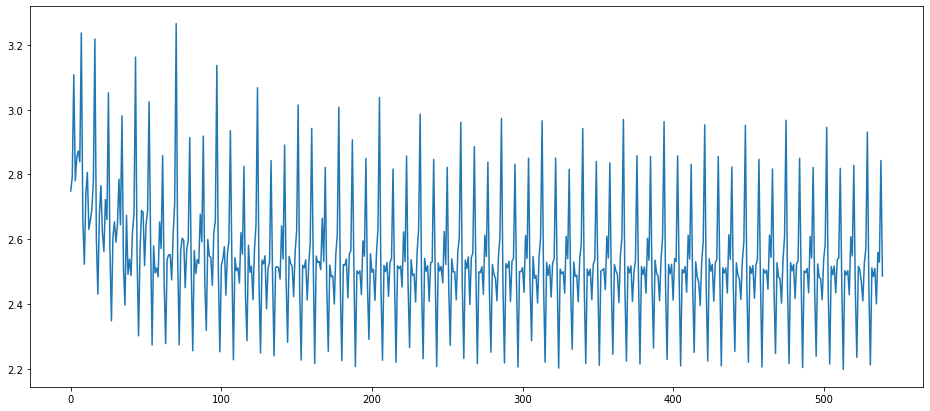

In [46]:
rmse_values = []
for i in RMSEs:
    rmse_values.append(i[3])
plt.figure(figsize = (16, 7))
plt.plot(rmse_values[0:len(rmse_values):10])

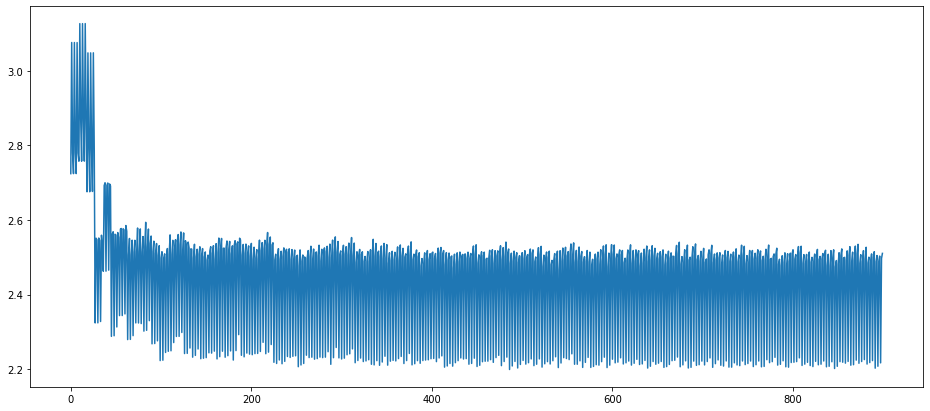

In [74]:
plt.figure(figsize = (16, 7))
plt.plot(RMSEs[0:len(RMSEs):2])

In [68]:
W = np.array([[np.random.uniform(0, 0.3) for i in range(5)] for i in range(9+1)])
print(W)
print(W[0])
print(W.shape)

[[0.09552355 0.288335   0.23239186 0.12390739 0.14279941]
 [0.21077547 0.24748453 0.28076523 0.239656   0.09315271]
 [0.25744417 0.02205483 0.27106549 0.06774961 0.07913188]
 [0.09190683 0.23137026 0.08537843 0.20087507 0.24772786]
 [0.24280277 0.24507153 0.20060565 0.1963301  0.21648446]
 [0.05319143 0.06316631 0.08232659 0.19539486 0.1856796 ]
 [0.13481869 0.06445189 0.04348497 0.16529896 0.09762303]
 [0.16593909 0.19528528 0.09257705 0.15107928 0.01433579]
 [0.02159071 0.20476752 0.29062547 0.20883694 0.22186386]
 [0.20799986 0.24021852 0.13022694 0.2921946  0.10413072]]
[0.09552355 0.288335   0.23239186 0.12390739 0.14279941]
(10, 5)


In [47]:
RMSEs

[[0, 0.001953125, 0, 2.7491881633742508],
 [1, 0.001953125, 0, 2.793099469580772],
 [2, 0.001953125, 0, 3.1080725694631592],
 [3, 0.001953125, 0, 2.780238170397807],
 [4, 0.001953125, 0, 2.853645585398399],
 [5, 0.001953125, 0, 2.873721284660855],
 [6, 0.001953125, 0, 2.9057235503125076],
 [7, 0.001953125, 0, 3.4407237552324452],
 [8, 0.001953125, 0, 2.725843062367923],
 [0, 0.015625, 0, 2.7491910592325537],
 [1, 0.015625, 0, 2.793095876691257],
 [2, 0.015625, 0, 3.1080676344668348],
 [3, 0.015625, 0, 2.780236330086356],
 [4, 0.015625, 0, 2.853645975010943],
 [5, 0.015625, 0, 2.8737204947353057],
 [6, 0.015625, 0, 2.905724712844924],
 [7, 0.015625, 0, 3.440727433678743],
 [8, 0.015625, 0, 2.7258467124954566],
 [0, 0.125, 0, 2.7492142391533427],
 [1, 0.125, 0, 2.7930671502993496],
 [2, 0.125, 0, 3.1080281661421294],
 [3, 0.125, 0, 2.780221618318721],
 [4, 0.125, 0, 2.8536491045475545],
 [5, 0.125, 0, 2.873714184457914],
 [6, 0.125, 0, 2.9057340247841563],
 [7, 0.125, 0, 3.44075686969978

In [50]:
import csv

with open("output.csv",'w') as resultFile:
    wr = csv.writer(resultFile, dialect='excel')
    wr.writerows(RMSEs)